In [ ]:
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#get true labels and predictions
y_true = test_gen.classes
y_pred_probs = model_final.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

class_labels = list(test_gen.class_indices.keys())

#classification report: Precision, Recall, F1
print(classification_report(y_true, y_pred, target_names=class_labels))

#calculate mAP (mean Average Precision, micro averaged across classes)
#convert true labels to one-hot
from sklearn.preprocessing import label_binarize

y_true_one_hot = label_binarize(y_true, classes=np.arange(len(class_labels)))

mAP = average_precision_score(y_true_one_hot, y_pred_probs, average="macro")
print(f"\nMean Average Precision (mAP): {mAP:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 482ms/step
              precision    recall  f1-score   support

         Bin       0.44      0.49      0.46       156
       Glass       0.80      0.85      0.83       204
       Metal       0.55      0.35      0.43       153
       Other       0.16      0.88      0.26         8
     Plastic       1.00      0.90      0.95        82

    accuracy                           0.64       603
   macro avg       0.59      0.69      0.59       603
weighted avg       0.67      0.64      0.64       603


Mean Average Precision (mAP): 0.6452


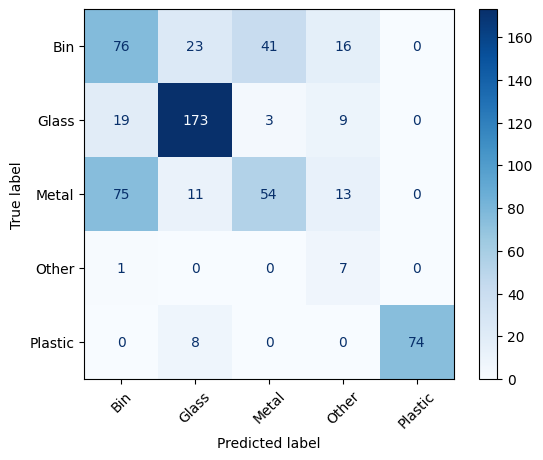

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


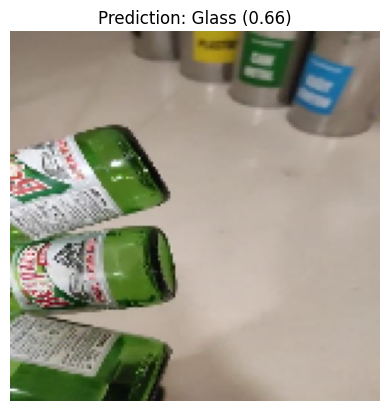

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#load the trained model
model = load_model("final_best_model.h5")

#class labels (use the same as in training)
class_labels = list(train_gen.class_indices.keys())

def predict_and_show(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    #predict
    pred = model.predict(img_array)
    class_index = np.argmax(pred, axis=1)[0]
    class_label = class_labels[class_index]
    confidence = np.max(pred)

    #display image and prediction
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_label} ({confidence:.2f})")
    plt.show()

predict_and_show("/content/trash_data/test/62a3371f42f9562a3371f42f9c_frame17_jpg.rf.681024b0dc2058774ccd0bc9ba717dec.jpg")